In [6]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
connect = sqlite3.connect('../../datasets/checking-logs.sqlite')

In [8]:
query = """ 
SELECT uid, numTrials, timestamp FROM checker
WHERE uid LIKE 'user_%' AND status = 'ready' AND labname = 'project1'
ORDER BY uid
"""
commits = pd.read_sql(query,connect,parse_dates=['timestamp'])
commits.sort_values(by='timestamp')

,uid,numTrials,timestamp
777,user_4,1,2020-04-17 05:19:02.744528
778,user_4,2,2020-04-17 05:22:45.549397
779,user_4,3,2020-04-17 05:34:24.422370
780,user_4,4,2020-04-17 05:43:27.773992
781,user_4,5,2020-04-17 05:46:32.275104
...,...,...,...
278,user_19,26,2020-05-15 10:22:39.698523
279,user_19,27,2020-05-15 10:22:46.248162
280,user_19,28,2020-05-15 10:23:18.043212
656,user_28,27,2020-05-15 10:38:14.430013


Text(0.5, 0.98, 'Dynamic of commits per user in project1')

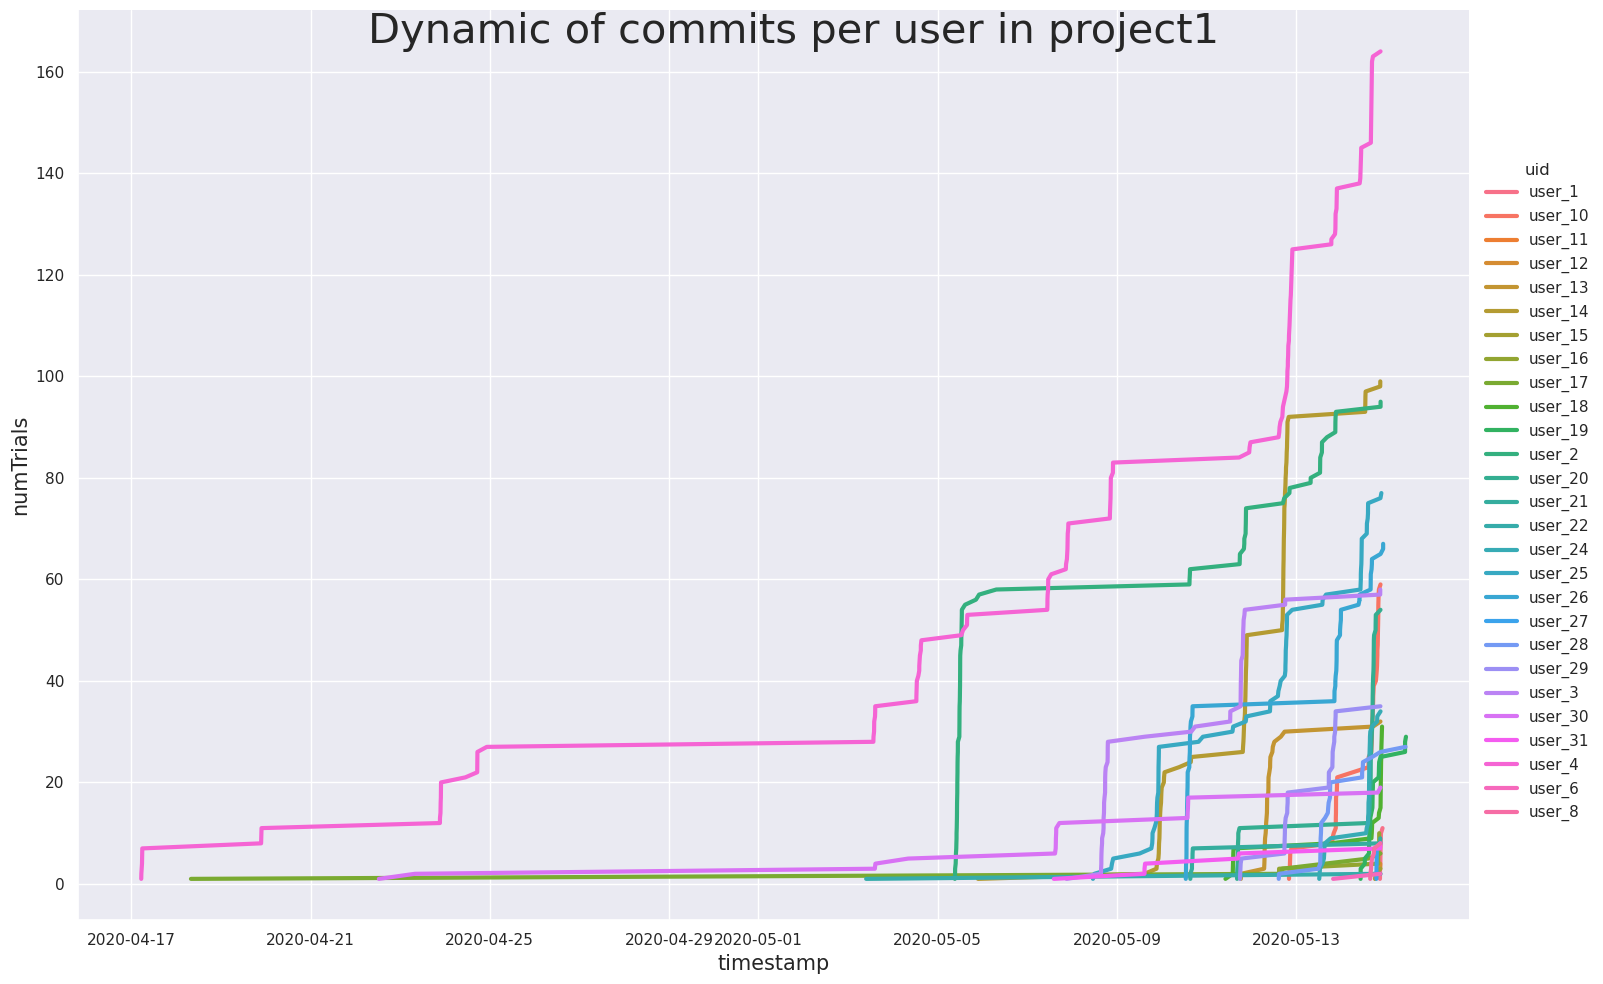

In [11]:
sns.set(palette='dark',
        rc={'axes.labelsize':15,
            'lines.linewidth':3})
sns.relplot(data=commits,
           x='timestamp',
           y='numTrials',
           legend='full',
           hue='uid',
           kind='line',
           height=10,
           aspect=1.5)
plt.suptitle('Dynamic of commits per user in project1',fontsize=30)

In [12]:
connect.close()

Какой пользователь практически все время лидировал по количеству коммитов?  

user_4  

Какой пользователь был лидером лишь короткий период времени?  

user_2